# "Model Fitness" Gym -  Customer Churn Project

In the following project, we will use data of customers in a gym chain called "Model Fitness" to reduce its churn rates. Using analysis and forcast, we will come up with a customer retention strategy. 
During this project, we will:
- Learn to predict the probability of churn in the next month for each customer.
- Divide users to groups and describe each groups' main features.
- Analyze the factors that impact churn most.
- Draw conclusions and recommendations to improve customer service and reduce churn.

The project will consist of 5 parts:
1. Loading the data and preprocessing
2. Exploratory data analysis (EDA) -in this part, we will get better understanding of the data and try to find the factors that impact churn most.
3. Predicting user churn - We will build a model to predict whether a user will leave next month.
4. Create user clusters - We will divide the users into groups and identify unique characteristics of each group.
5. Conclusions and recommendations - Based on our findings, we will formulate recommendations regarding customer service strategy.

## Loading the Data and Preprocessing

We will load the necessary libraries and the data, then print some overviews of the data.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
## Reading the data

try:
    gc = pd.read_csv('gym_churn_us.csv')
except:
    gc = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gc.info()

gc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

(4000, 14)

In [4]:
gc.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Let's print a description of the data, to see if there are any unusual values.

In [5]:
gc.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Data Type Conversion

Month_to_end_contract column stores the number of months left for a customer until its contract ends. Let's see if it has float number to indicate parts of a month.

In [6]:
gc['Month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

There are no float values in this column. We can convert it to int.

In [7]:
gc['Month_to_end_contract'] = gc['Month_to_end_contract'].astype(int)

### Missing Values and Duplicates

In [8]:
print("There are {} missing values in the dataset.".format(gc.isnull().sum().sum()))

There are 0 missing values in the dataset.


In [9]:
print("There are {} duplicates in the dataset.".format(gc.duplicated().sum()))

There are 0 duplicates in the dataset.


There are no missing values, and no duplicates as well. We can move on.

### Column Names

To address the columns more easily, we will convert all column names to lowercase.

In [10]:
gc.columns = gc.columns.str.lower()

### Conclusions

In the preprocessing project, we made the data ready for analysis and prediction. We converted column names to lowercase to address them more easily. We checked the data for missing values, duplicates, column data types and anomalies in the data, no action was required. 

## Exploratory Data Analysis (EDA)

In this section, we will further investigate the data. 
We will go through the following steps:
1. Investigating features - mean value and SD.
2. Investigating features in groups: churn/no churn.
3. Feature distribution in groups: churn/no churn.
4. Correlation matrix of the features.

### Investigating Features
There are no missing features in any of the rows. Let's study the mean values and standard deviation of the features in the dataset.

In [11]:
gc.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- `gender` - Balanced, 51% vs 49%.
- `near_location` - Most customers, 84%, live or work close to the gym.
- `partner` - 48.6% are employees of a partner company. 
- `promo_friends` - 31% used a promo code given by a friend.
- `phone` - 90% of the users provided a phone number.
- `contract_period` - The average number of months left for our customers is 4.7. However, at least 50% are on a short term plan of 1 month.
- `group_visits` - Only 41% of the users take part in group sessions.
- `age` - users are between the ages 18-41. The average age is 29, and the SD is 3, which means that (assuming a normal distribution) most customers are between the ages 26-32. 
- `avg_additional_charges_total` - All customers pay some additional charges, with the mean at 146 and max value of 552. As SD is 96, there seems to be high dispersion with relatively many customers having additional charges from 50 to 250.
- `month_to_end_contract` - very similar to `contract_period`, and we can already say that these two columns will be probably highly correlated, and we will have to take care of it before building the model.
- `lifetime` - Most customers are relatively new, with 75% have a lifetime of 5 months and an average of 3.7.
- `avg_class_frequency_total` - The average frequency is 1.8 times a week. SD is relatively high - 0.97, which could suggest that there are many customers with an average around 0. 
- `avg_class_frequency_current_month` - Quite similar to the previous column, and could also be highly correlated with it.
- `churn` - 26.5% of the rows in the dataset indicate a churn.

### Investigating Features - Churn vs. Non-churn

In [12]:
gc.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


By comparing the means of those who have churned and those who stayed, we can identify several differences between the groups:
- Naturally, **there is a higher share of people who live\work far from the gym among those who have churned.**
- **Employees of a partner company and those who used promo code of a friend tend more to stay.** This is possibly a result of discounts they received, or merely they are more motivated to stay when they can go with their friends\collegues.
- Customers with longer contract period tend to stay more, while **those who churn usually have a contract for a shorter term.**
- **Customers who don't take part in group sessions tend more to churn.** This might also be explained by the social effect of exercising with other people.
- **Customers who churn are usually 3 years younger**, with an average of 27. Perhaps there are also financial reasons, where younger people cannot afford paying to the gym, or maybe older people are more aware of the health benefits of working out.
- **People who pay more additional charges, tend to stay more.** Perhaps this is also due to financial reasons, or maybe they simply spend more time in the gym and its facilities.
- The **lifetime of users who churn is very low** - 0.99 months. This suggests that **many of them churn during the first month.** Perhaps those who manage to stay after the first month are more likely to go regularly, and therefore stay in the gym.
- **Customers who churn go less frequently to the gym.** While those who stay have an average of two times a week, those who churn has a total average of 1.47. This number decreases even more, to one time a week, in the month they churn. 
- **Gender** does not seem to affect churn rates.

### Feature Distribution

In this chapter, we will plot histograms for the distributions of features among customers who have churned and those who have stayed.

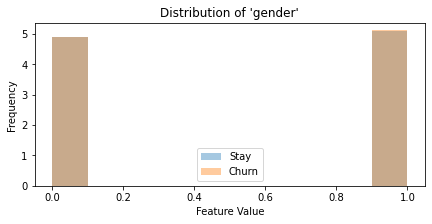

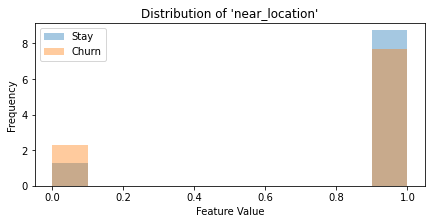

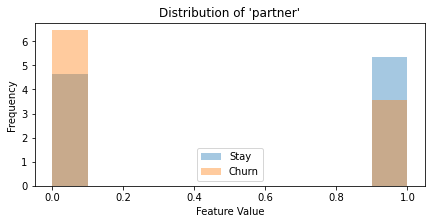

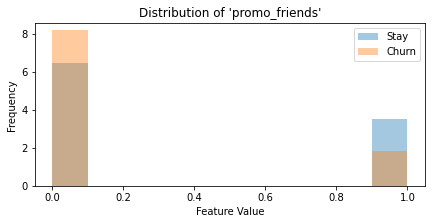

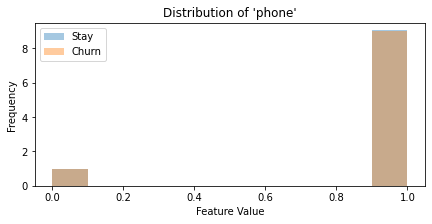

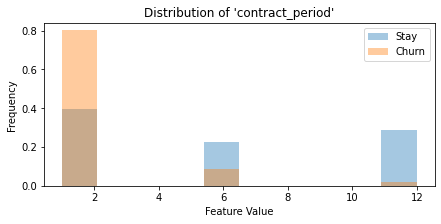

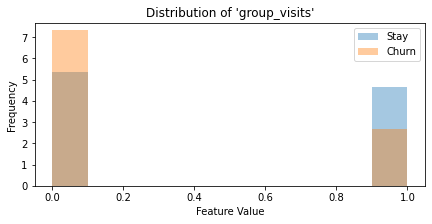

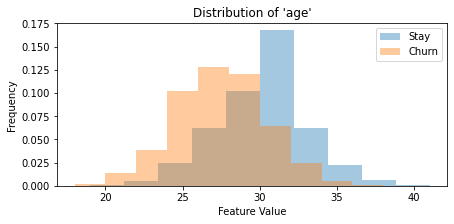

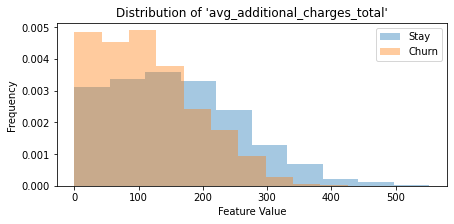

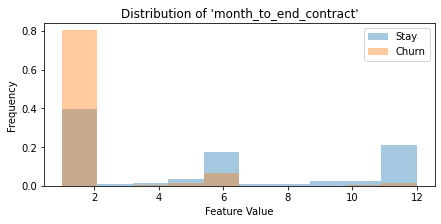

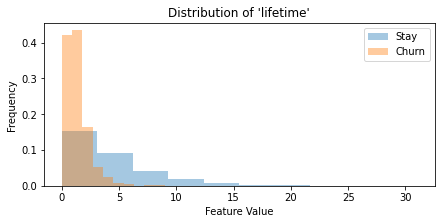

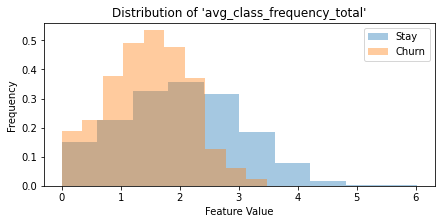

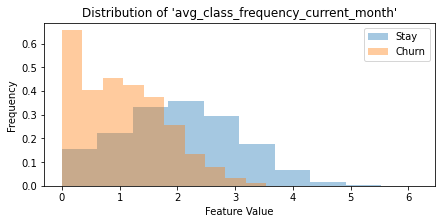

In [13]:
## Create a list of the columns and remove `churn` from it
columns_minus_churn = gc.columns.tolist()
columns_minus_churn.remove('churn')

## Print a histogram for each feature

for column in columns_minus_churn:
    fig = plt.figure(figsize=(7,3))
    plt.title("Distribution of '{}'".format(column))
    plt.hist(gc.query('churn == 0')[column], alpha=0.4, density=True);
    plt.hist(gc.query('churn == 1')[column], alpha=0.4, density=True);
    plt.xlabel("Feature Value");
    plt.ylabel("Frequency");
    plt.legend(labels=['Stay', 'Churn'])

Some of the distributions provide additional information. We can see, for example, that the churn customers are younger than the customers who stayed. The gap is very clear for customers in their early 30s, perhaps as people turn 30 they feel a stronger. It is also visible that Churn customers tend to spend less, most frequently up to 100, while 'Stay' users tend to spend more.

Most churn customers (80%), naturally, did it at the end of their contract, but a similar share of them were on a 1-month contract originally. Moreover, most churn customers (over 80%) had a lifetime of 1 or 2 months. The number drops significantly in the next months.

We can also see that churn customers spend less time in the gym, with most of them going only 1-2 times a week on average. In their last month at the gym, most of the people who churned (over 60%) had an average of 0 visits per week in the gym. This seems to be a good indicator for churn. 


### Correlation Matrix


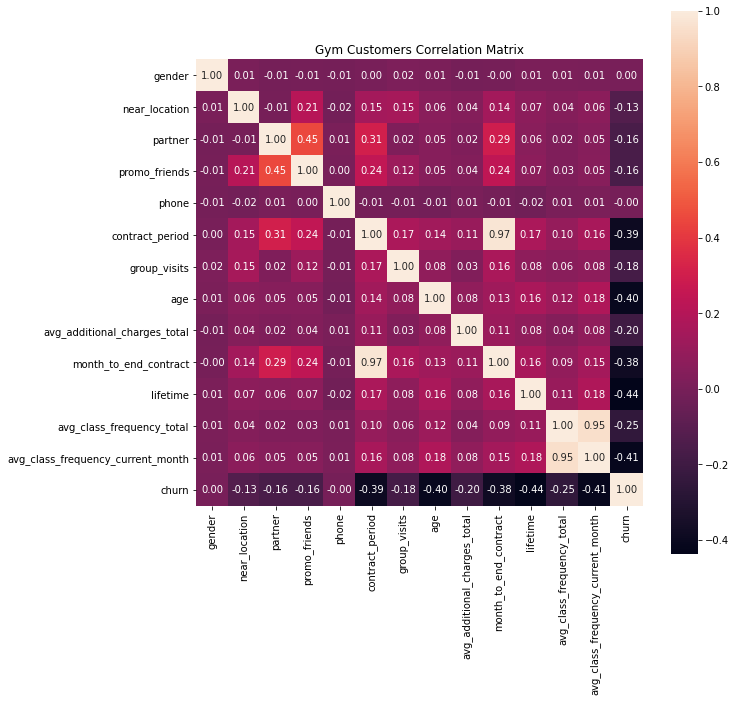

In [14]:
## Building a correlation matrix

cm = gc.corr()

## Displaying it in a heatmap

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.2f', square=True);
plt.title('Gym Customers Correlation Matrix');


No feature is highly correlated with churn. The strongest association is around -0.4 for `contract_period`, `month_to_end_contract`, `age`, `lifetime` and `avg_class_frequency_current_month`, as we observed earlier.

As expected before, we can also see very high correlation between `month_to_end_contract` to `contract_period`, and between `avg_class_frequency_current_month` to `avg_class_frequency_total`. 

Another interesting associations: `promo_friends` and `partner` has a positive correlation of 0.45, which may suggest that some customers use both partner aggreements and promotion codes.

`promo_friends` and `partner` also has relatively higher correlations with `contract_period`, which shows that customers who come from these sources tend to sign a longer contract.

### Conclusions

In this chapter we investigated our dataset, the features and their relations to the target variable, churn. We learned that younger customers are more likely to churn, as well as those who didn't sign up using promo code or partners plan. Higher churn rate is also associated with less visits at the gym and lower lifetime. 

## Churn Prediction Model

In the following chapter, we will build a binary classification to predict customer churn. 
We will train the model using two methods:
- Logistic regression
- Random forest

Then, we will evaluate their metrics and determine which one gave better results.

### Featrue Selection
Since we will be using regression models, we cannot leave the highly correlated features in place as they may harm the model's accuracy. Since we are trying to predict a customer behaviour in the following month, we will keep the column with more recent data, over the column that stores an average of a longer period.
- Out of `month_to_end_contract` and `contract_period` - `contract_period` will be removed.
- Out of `avg_class_frequency_current_month` and `avg_class_frequency_total` - `avg_class_frequency_total` will be removed.

In [15]:
## Dropping highly correlated columns

gc_fs = gc.drop(['contract_period', 'avg_class_frequency_total'], axis=1)

### Dividing the Data
Now we can start working on our model. First, let's divide our data into train and validation sets.

In [16]:
## Setting our features and target variables

X = gc_fs.drop('churn', axis=1)
y = gc_fs['churn']

## Splitting the set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Building the Models

In [17]:
## Building a function that gets a model and a set and runs it

def create_model(model_name, X_train, y_train, X_test, y_test):
    model = model_name
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    ## Print model name and its metrics
    
    print(str(model_name)+":")
    print_metrics(y_test, predictions)
    print()

### Calculating Metrics

In [18]:
## A function to calculate and print model metrics

def print_metrics(y_true, y_pred):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_true, y_pred)))

### Running the Models

In [19]:
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

## Run the function for each model in the `models` list

for model in models:
    create_model(model, X_train, y_train, X_test, y_test)

c:\users\idan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0):
Accuracy: 0.90
Precision: 0.79
Recall: 0.80

RandomForestClassifier(random_state=0):
Accuracy: 0.91
Precision: 0.83
Recall: 0.79



### Evaluating Models Metrics
RandomForestClassifier has better results in accuracy and precision. However, it should be noticed that recall metric is slightly higher in LogisticRegression. Since we are looking for customers who we fear might churn, it would be worse to miss such a customer, than to reach out to one that is not really intending to leave. Thus, we might be better off using LogisticRegression.

### Conclusions
In this chapter, we build two models to predict churn and evaluated their performance. First, we removed two features that were highly correlated to other features and could harm the model's performance. Then, we divided the dataset into train and validation data.

We then created two functions: one runs a model, and the other one calculates and prints each model's metrics. We then ran the functions with two models: LogisticRegression and RandomForestClassifier.

RandomForestClassifier had better results in accuracy and precision. However, LogisticRegression had better results in the recall metric. Though LogisticRegression got higher score in only one metric out of three, recall is the most important metric for our purpose, as a higher recall rate means we miss less customers who might churn.

## Customer Clusters

In this section, we will use a model to group our customers into clusters. Then, we will try to identify what characterizes each of the groups we found. 

First, we will prepare our data for the model. Then, we will build and run the model. Finally, we will analyze the insights we received using our model.

### Preparing the Data
In this stage, we to omit the churn data from the dataset. Then, we will standardize the data.

In [20]:
## Variable X stores the data without churn column

gym_clusters = X

## Standardizing the data

scaler = StandardScaler()
clusters_st = scaler.fit_transform(gym_clusters)

### Finding Clusters
We will use the `linkage()` function to plot a dendrogram and estimate the number of clusters we need. Then, we will set this number to the Kmeans model.

In [21]:
linked = linkage(clusters_st, method = 'ward') 

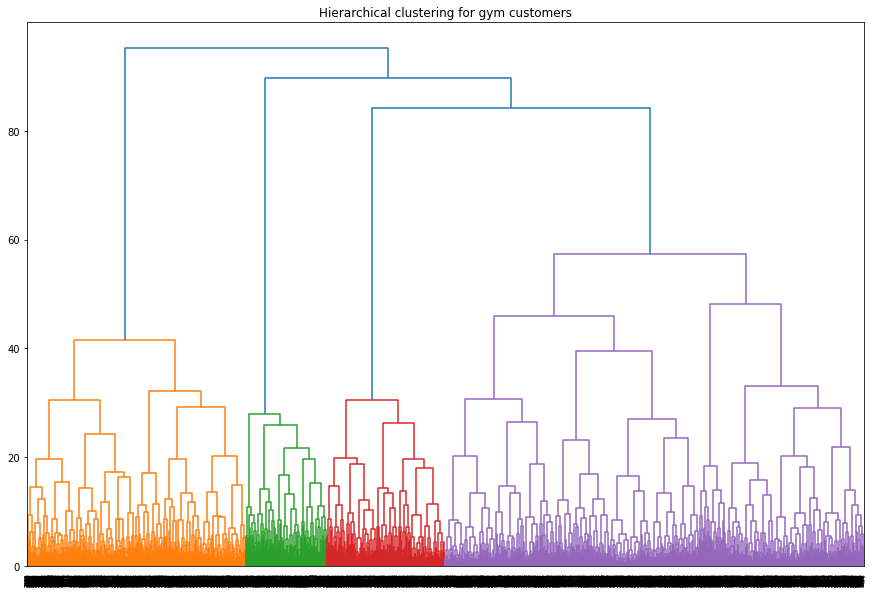

In [22]:
## Plotting a dendrogram

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym customers')
plt.show() 

The model suggest using 4 clusters. However, we can see that one group can be splitted to two groups that are more similar in size to the rest of the groups. Also, to be in line with the rest of the students for this task, we will use 5 clusters.

We will now predict the clusters using the KMeans model, then store the predictions to the original dataset.

In [23]:
## Set the model

km = KMeans(n_clusters=5)

## Fit the model and predict

labels = km.fit_predict(clusters_st)

In [24]:
## Store the cluster labels to the original dataset

gc['cluster_km'] = labels

### Clusters Analysis
In this part, we will analyze the clusters we found earlier, and try to identify their characteristics. Similarly to the EDA section, we will first look at the mean feature values for each cluster. Then, we will plot their distributions. Finally, we will calculate the churn rate for each cluster, and see which are prone to leaving, and which are loyal.

#### Clusters Mean Values

In [25]:
gc.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.490792,0.993554,0.954880,0.831492,1.0,8.085635,0.526703,29.640884,153.975513,7.427256,4.251381,1.975287,1.944461,0.085635
2,0.556375,0.997893,0.193888,0.061117,1.0,4.492097,0.541623,30.841939,177.283580,4.108535,5.559536,2.378391,2.376448,0.028451
3,0.487280,1.000000,0.266145,0.111546,1.0,2.131115,0.261252,27.381605,117.475044,1.998043,1.767123,1.385475,1.120690,0.600783
4,0.502693,0.000000,0.488330,0.073609,1.0,2.978456,0.235189,28.698384,137.507244,2.800718,3.014363,1.763274,1.598704,0.402154


Some of the clusters are similar in many features, but unique in others:
- **Cluster 0** - Distinguished mainly by customers who don't live\work near the gym. They also have lower rates of using friends promo codes (only 7% - perhaps they don't have company when going to the gym?), they usually don't attend group sessions, and they visit the gym relatively less frequently then others. They are relatively young, and the average contract is 3 months long.
- **Cluster 1** - These are customers who live\work near the gym, usually not through a partner employer or a friend. They are the youngest group, and they have the shortest contract and lifetime. In addition, they pay the lowest rate of additional charges. They attend the gym significantly less frequently than the average.
- **Cluster 2** - This group has the oldest customers with an average of almost 31. They also have the highest lifetime and a contract length of, on average, 6 months. In addition, they spend more than the average on additional charges, and attend the gym more than the average (over twice a week). 
- **Cluster 3** - These are customers who did not provide a phone number. Other than that, their rates are pretty much around the average.
- **Cluster 4** - This group consists of customers who signed up using a friends promo code. Virtually all of them live\work near work, and the vast majority of them are also employees of our partners. They have the highest contract period, almost 7 months, which means that probably many of them register for a 12 months contract. They are relatively old, with an average of 29.5. They have a relatively high lifetime value, and they attend the gym more than the average.

#### Clusters Distributions

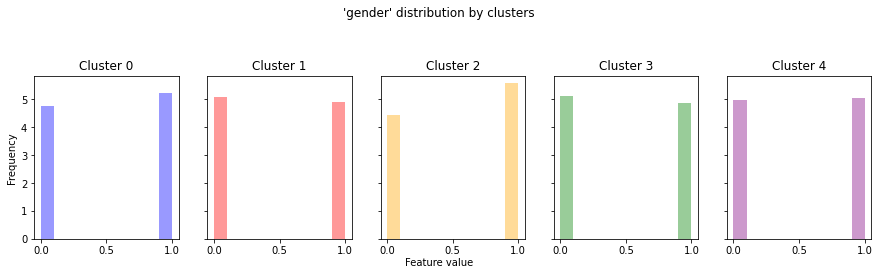

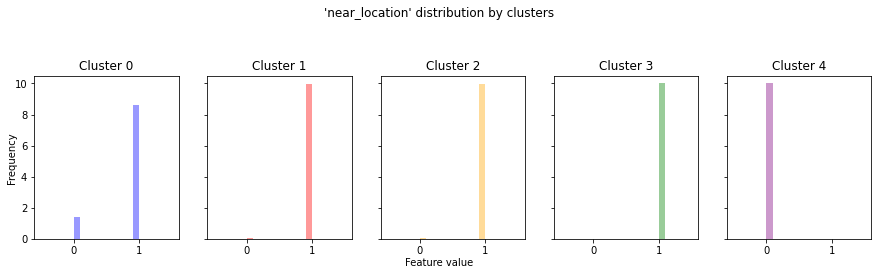

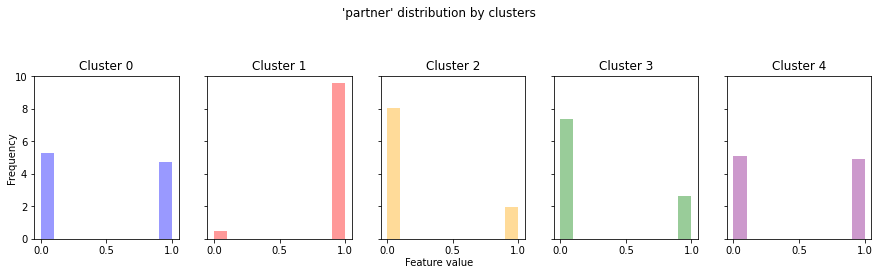

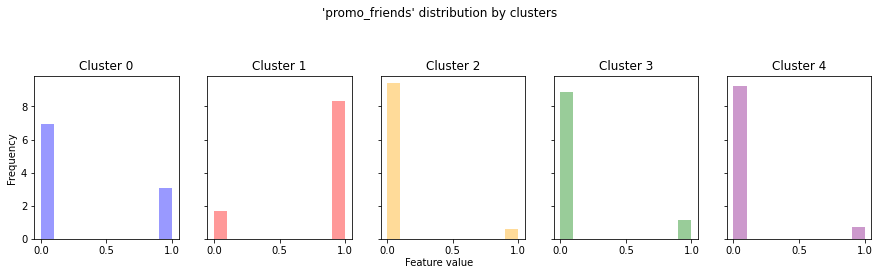

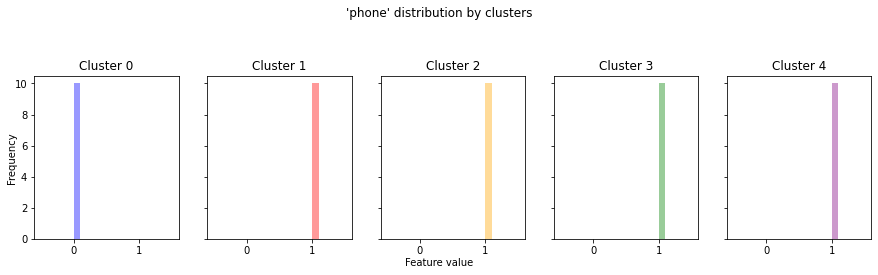

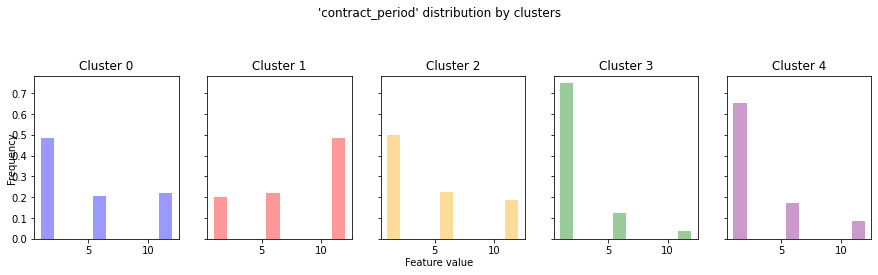

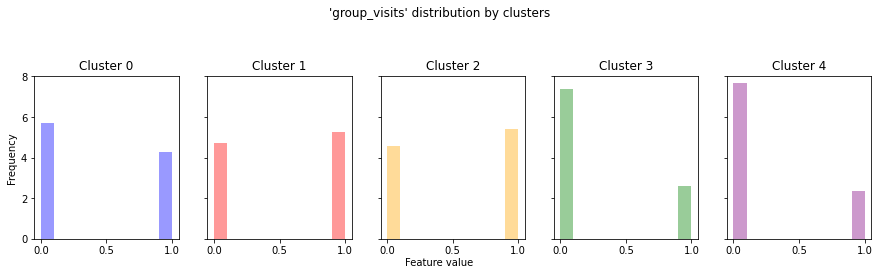

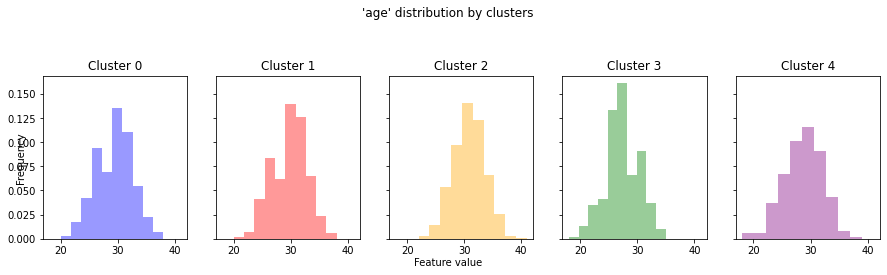

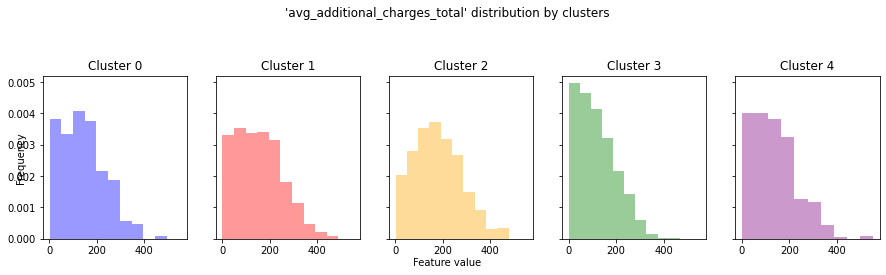

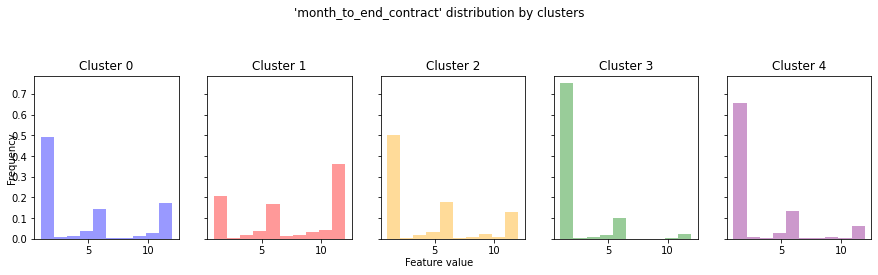

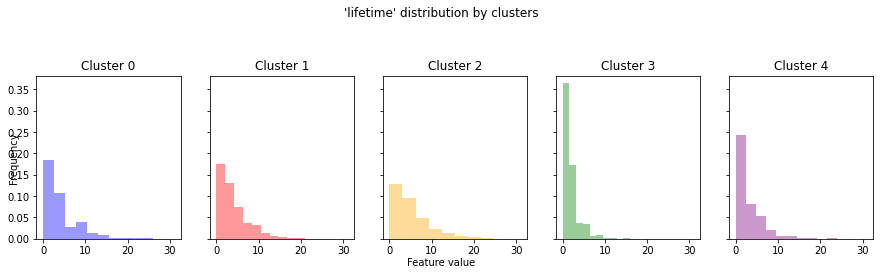

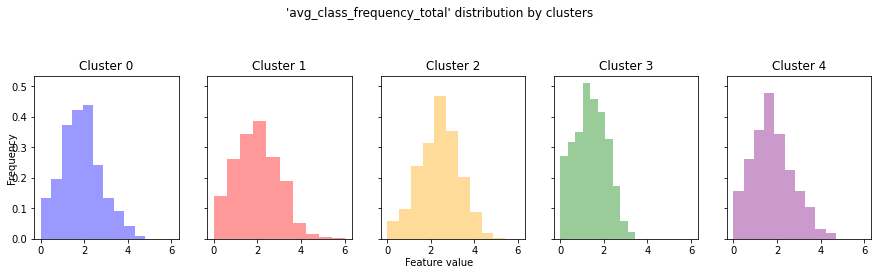

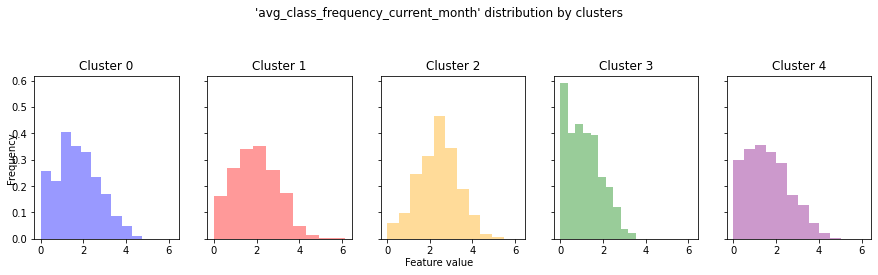

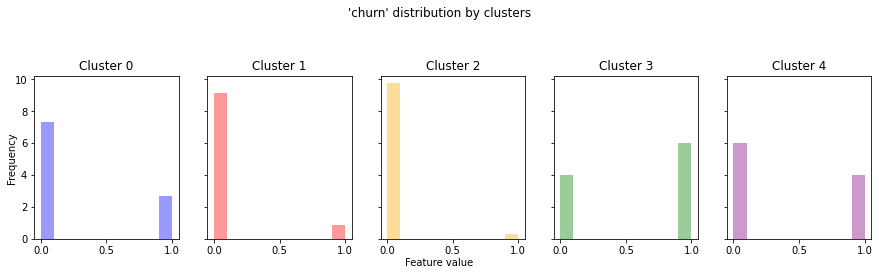

In [26]:
## Choose a color for each cluster

colors = ['blue', 'red', 'orange', 'green', 'purple']

## Get a list of the columns without `cluster_km`

columns_no_km = gc.columns.tolist()
columns_no_km.remove('cluster_km')

## Draw a histogram for each cluster

for column in columns_no_km:
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,3), sharex=True, sharey=True)
    
    ## Set shared title
    
    fig.suptitle("'{}' distribution by clusters".format(column), y=1.2)

    ## Set shared axis labels
    
    fig.text(0.5, 0, 'Feature value', ha='center')
    fig.text(0.1, 0.5, 'Frequency', va='center', rotation='vertical')

    for i in range(0,5):
        ax[i].hist(gc.query('cluster_km == @i')[column], color = colors[i], alpha=0.4, density=True);
        ax[i].set_title('Cluster '+str(i));


- In **cluster 0**, we can see that most customers, more than 60%, have a contract of only one month. Also, they are most commonly new customers - the most frequent lifetime value is zero. 
- In **cluster 1**, more than 50% of the customers had no visits in their last month, and they are most frequently new customers, with 35% of them having a zero lifetime value. More than 70% of them have a contract of 1 month. To summerize, many customers in cluster 1 signed a 1 month contract, and did not attend the gym at all.
- In **cluster 2**, we can see a much more even distribution of contract periods, though 1 month plan is still the most frequent. The share of new customers (0 lifetime value) is much lower than other clusters.
- In **cluster 3**, distributions seem similar to other clusters. However, interestingly, there is a relatively large share of people with zero attendance in current month. 
- In **cluster 4**, customers' most frequenct contract is of 12 months. 

### Churn Rates Across Clusters
Let's calculate churn rate for each cluster.

In [27]:
gc.groupby('cluster_km')['churn'].mean().sort_values(ascending=False)

cluster_km
3    0.600783
4    0.402154
0    0.266839
1    0.085635
2    0.028451
Name: churn, dtype: float64

**Cluster 1 is prone to leaving the most**, with a **churn rate of 57%**. These are customers who did not sign up through a partner or a promo code. Many of them sign up for a 1 month contract, barely attend the gym, then churn. They are also the youngest group. Perhaps we could try to attract them to attend the gym more often, or offer them a discount, considering most of them don't have the benefits of our partners or promo codes. If we get some of them more active in the gym or in better terms, they would continue for the second month.

**Cluster 0 is second worst,** with a **churn rate of 40%.** These are customers who do not live or work near the gym. The vast majority of them also did not use a promo code, which may suggest they don't have company in the gym - they also attend the gym less than the average. Most of them are new customers who signed up for a 1 month contract. If we could offer them benefits for bringing friends, they might be more motivated to go to the gym and sign a new term at the end of the month. 

**Cluster 3 has better results**, but still, a **churn rate of 26%.** These are customers who did not provide a phone number. Their rates were usually around the average of other clusters, and the case is probably similar to churn rate as well.

**Cluster 4 is second best** with a **churn rate as low as 12%.** These are mostly customers who signed using a promo code, and they also work in a partner employer. They probably have company when going to the gym, and that is possibly why they tend to sign a 12 months contract.

**The most loyal group is cluster 2** with a **churn rate of 1.7%.** This group is mainly characterized by older ages - most of them are over 30. They spend more time and money in the gym, and a significant share of them are not new members at the gym and have longer contracts. 

### Conclusions

In this section, we used a model to find clusters of customers in our dataset. We used a dendrogram to find the optimal number of clusters. Then, we used this with a KMeans model, that divided our customes into 5 groups.

We then analyzed the characteristics of each group, and their churn rates. We found more loyal groups, whose churn rates are low. These groups consist mostly by customers who are over 30 and go regularly to the gym, or customers who signed up using a promo code or a through a partner.

In contrast, we saw groups with churn rates as high as 40% and 57%. These are mainly customers who did not sign up using a promo code nor through a partner, or they do not live\work near the gym.

## Recommendations and Conclusions

The gym's stategy for customer interaction and retention could really enjoy the use of the two models that were developed in this project. Here are some recommendations:
1. **Regular use of the churn predict model** to actively look for customers who are prone to churn. The gym could reach out to them, understand what can be done for them, and find a tailored solution for them.
2. **Using and understanding customer clusters** to offer our customers plans that will make their experience better, and help them stay as customers. Here are few examples:
    - Our promo code and partners plan are paying off - customers who signed up for these plans are more loyal. These are important plans for the gym, and it is recommended to maintain and expand them. **Promo code and partners plan make our customers stay longer** - and this could be either their financial benefits or social benefits (of having a company when going to the gym).
    - Our plans currently fit **people in their 30s** and over, but we struggle to keep the younger customers around. We can go in either direction: Focus our marketing efforts in people in their 30s, or try to attract younger people to the gym.
    - Younger people who don't sign through promo code or partner plan, are likely to churn. Many of them sign up for a month, don't attend the gym and churn at the end of the month. Perhaps if we help them get motivated to visit the gym, some of them will see the value in it, and we will earn them as customers. **Encouraging them to invite their friends could improve their experience** in the gym financially and socially, and help them stay.
    - Same recommendation could be applied to customers who don't live or work near the gym, who also suffer high churn rates.

To conclude, The models we developed can help the gym optimize the value it provides to its customers. We can offer larger segments of the customers plans that suit them, and keep them as our customers.